In [1]:
import os,sys

# Import functions from functions.py
cur_dir = os.path.abspath('.')
if cur_dir not in sys.path:
    sys.path.append(cur_dir)  # Ensure current directory is in path
backend_dir = os.path.abspath('../backend')
if backend_dir not in sys.path:
    sys.path.append(backend_dir)  # Ensure backend directory is in path
# print(sys.path)

root_dir = os.path.abspath(f"..")

INFO:app.gis.engine:Start processing Thames-Coromandel District
INFO:pyogrio._io:Created 1 records
INFO:app.gis.engine_models:Progress update: 10% - Phase: district - Description: Boundary prepared: Thames-Coromandel District
INFO:pyogrio._io:Created 1 records
INFO:app.gis.engine_models:Progress update: 11% - Phase: district - Description: Boundary Bounding Box prepared: Thames-Coromandel District
INFO:app.gis.engine:Thames-Coromandel District # Clipping coastlines data
INFO:pyogrio._io:Created 3 records
INFO:app.gis.engine:Thames-Coromandel District # Clipping residential data
INFO:pyogrio._io:Created 72 records
INFO:app.gis.engine:Thames-Coromandel District # Clipping rivers data
INFO:pyogrio._io:Created 6,088 records
INFO:app.gis.engine:Thames-Coromandel District # Clipping lakes data
INFO:pyogrio._io:Created 193 records
INFO:app.gis.engine:Thames-Coromandel District # Clipping slope data
INFO:app.gis.engine:range /Users/landy/UoW/COMPX576/code/site-analyzer/test-data/lris-lenz-slop

Finished processing Thames-Coromandel District
All selected districts processed successfully.


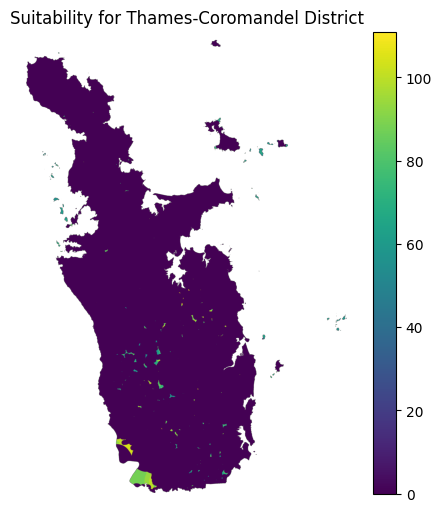

In [4]:
import os
import app.gis.tools as tools
import app.gis.consts as consts
import logging
from app.gis.engine_models import (
    EmptyTaskMonitor,
    EngineConfigs,
    RestrictedFactor, 
    SuitabilityFactor,
    TaskMonitor,
)
from app.gis.engine import SiteSuitabilityEngine

logging.basicConfig(level=logging.INFO)
# Set your data directory and output directory
root_dir = os.path.abspath('../')
data_dir = os.path.join(root_dir, "test-data")
output_dir = os.path.join(root_dir, "output-data", "engine")

# Initialize the engine
engine = SiteSuitabilityEngine(data_dir, output_dir, EngineConfigs(
    restricted_factors=[
        RestrictedFactor(kind="coastlines",buffer_distance=500),
        RestrictedFactor(kind="residential",buffer_distance=3000),
        RestrictedFactor(kind="rivers",buffer_distance=500),
        RestrictedFactor(kind="lakes",buffer_distance=1000)
    ],
    suitability_factors=[
        SuitabilityFactor(kind="slope",weight=1.5,ranges=None),
        SuitabilityFactor(kind="roads",weight=1.5,ranges=None),
        SuitabilityFactor(kind="powerlines",weight=2.0,ranges=None),
        SuitabilityFactor(kind="slope",weight=1.5,ranges=None),
        SuitabilityFactor(kind="solar",weight=4.0,ranges=None),
        SuitabilityFactor(kind="temperature",weight=1.0,ranges=None)
    ]
))

# Run the analysis for all districts
# results = engine.run()

# Or run for specific districts
results = engine.run(selected_districts=["011"])

# Visualize results
for district_name, result_path in results.items():
    if result_path:
        tools.show_raster_plot(result_path, title=f"Suitability for {district_name}")